**Exploratory Data Analysis**
Objectives of this notebook:
- Get the dataset basic metrics and shape
- Check target class distribuiton and balance
- Analyse numerical varaibles and look for outliers
- Analyse categorical and ordinal variables distribution and balance
- Look for basic correlations between variables

In [2]:
import pandas as pd

# FORGOT TO CHECK FOR MISSING VALUES

heart_file_path = 'cardio_data_processed.csv'
df = pd.read_csv(heart_file_path)
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


**Target variable expĺoration**
comparing the frequency of each class, we come to the conclusion that the cardio variable distribution is balanced

cardio
0    34533
1    33672
Name: count, dtype: int64


<Axes: xlabel='cardio'>

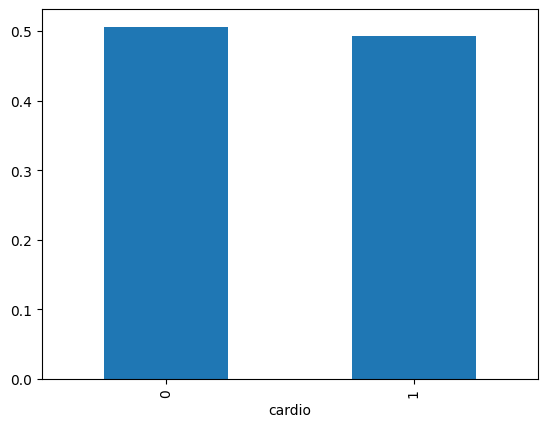

In [3]:
print(df['cardio'].value_counts())
df['cardio'].value_counts(normalize=True).plot(kind='bar')

**Numeric Variables Analysis**

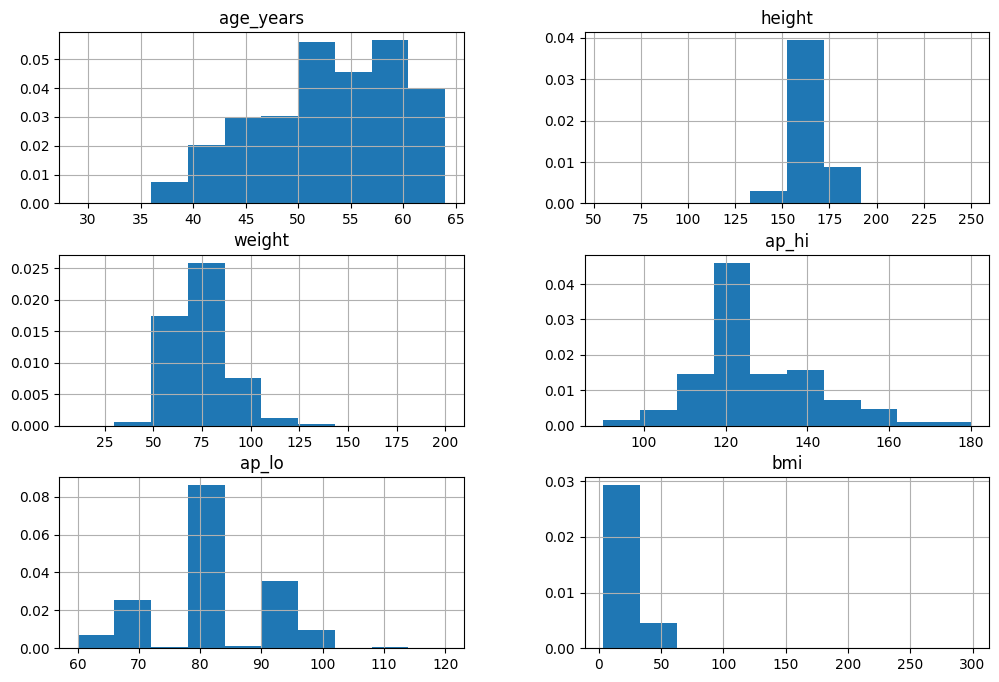

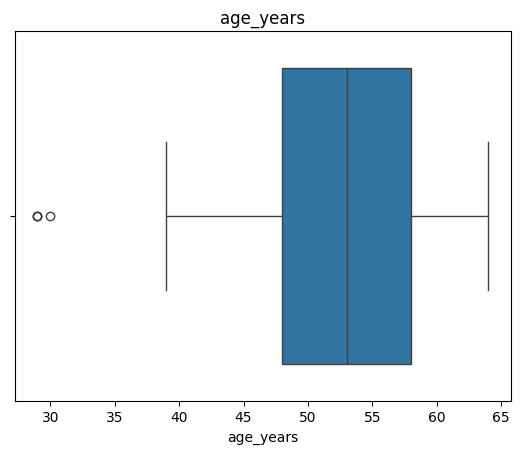

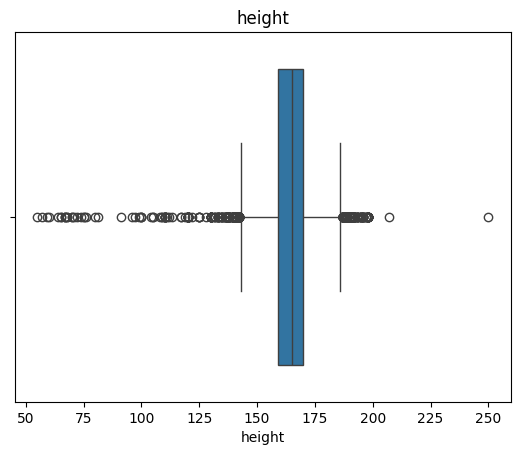

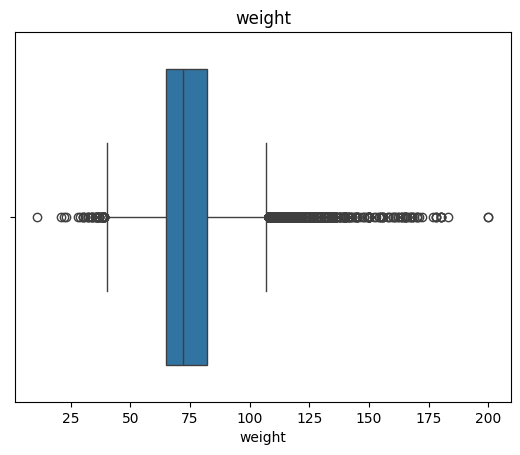

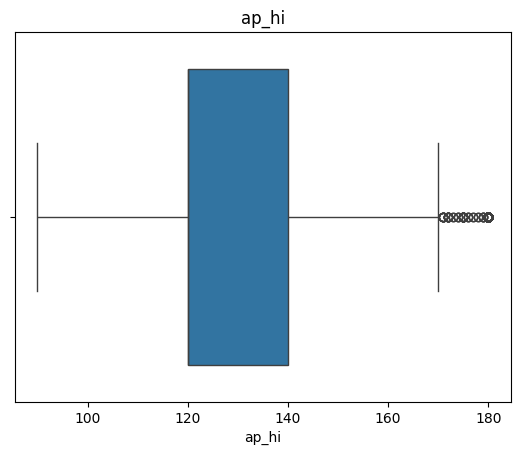

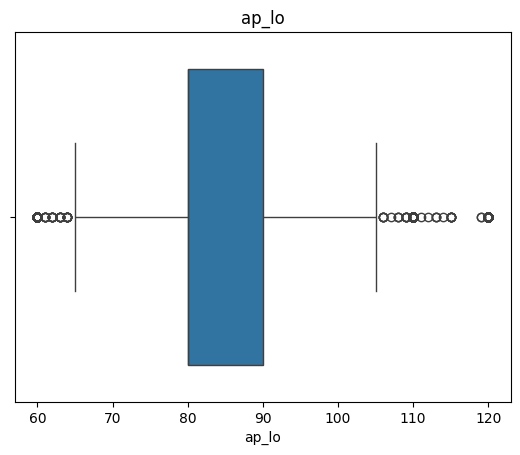

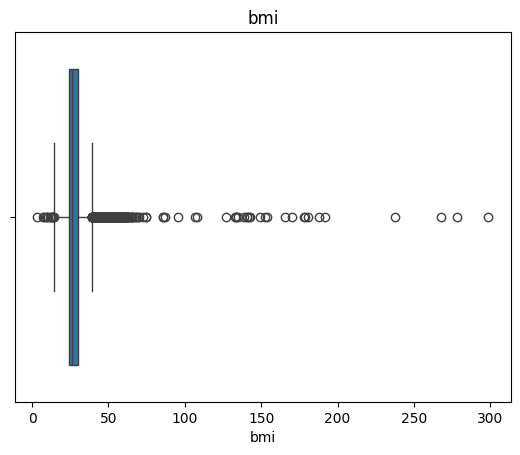

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
df[numerical_cols].hist(figsize=(12, 8), density=True)

plt.show()

for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Based on these graphs, we observe a strange distribution for height and weight, with unnusual outliers for weight and height which appear way smaller than the usual.
Upon further analysis, we see they are few and largely justifiable (height ok but small weight: some disease/treatment, etc)

In [5]:
weight_height_outliers = df.loc[(df['weight'] < 40) | (df['height'] < 130)]
print(weight_height_outliers.shape)
weight_height_outliers.head(10)

(133, 17)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
222,309,21800,2,76,55.0,120,80,1,1,0,0,1,0,59,95.221607,Hypertension Stage 1,Hypertension Stage 1
3337,4838,14516,1,100,70.0,100,70,1,1,0,0,1,0,39,70.000000,Normal,Normal
3644,5278,17642,1,120,70.0,120,70,1,1,0,0,1,0,48,48.611111,Elevated,Elevated
3661,5306,15400,1,120,30.0,110,70,1,1,0,0,1,0,42,20.833333,Normal,Normal
4104,5946,16110,1,120,80.0,120,80,1,1,0,0,1,0,44,55.555556,Hypertension Stage 1,Hypertension Stage 1
5642,8226,17663,1,151,37.0,120,80,1,1,0,0,1,0,48,16.227358,Hypertension Stage 1,Hypertension Stage 1
5992,8757,20990,1,122,161.0,120,80,1,1,0,0,1,1,57,108.169847,Hypertension Stage 1,Hypertension Stage 1
6643,9721,21405,2,120,80.0,140,80,2,2,0,0,1,0,58,55.555556,Hypertension Stage 1,Hypertension Stage 1
6932,10142,20579,2,117,78.0,150,90,1,1,1,0,1,1,56,56.980057,Hypertension Stage 2,Hypertension Stage 2
7119,10412,15859,1,120,80.0,120,80,1,1,0,0,1,0,43,55.555556,Hypertension Stage 1,Hypertension Stage 1


**Categorical Variables Analysis**
which categortical variables correlate more with cardio?
From anaslysing the graphs below, we clearly see the importance of cholesterol, glucose, bp_category and active on cardio presence
Other variables like gender, smoke and alcohol need further analysis to determine a correlation with cardio presence or absence

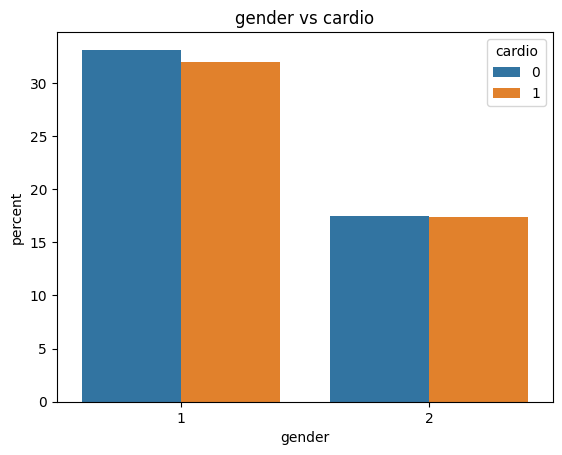

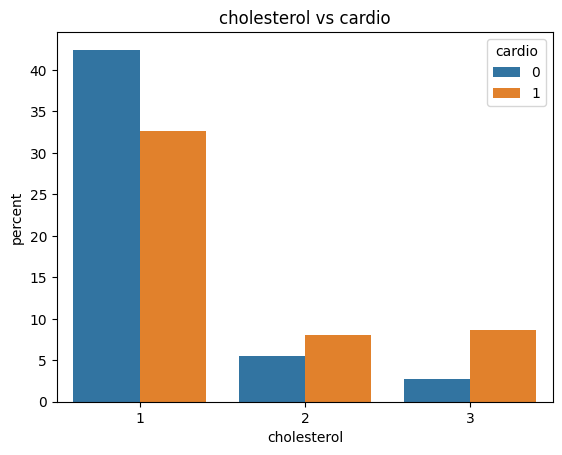

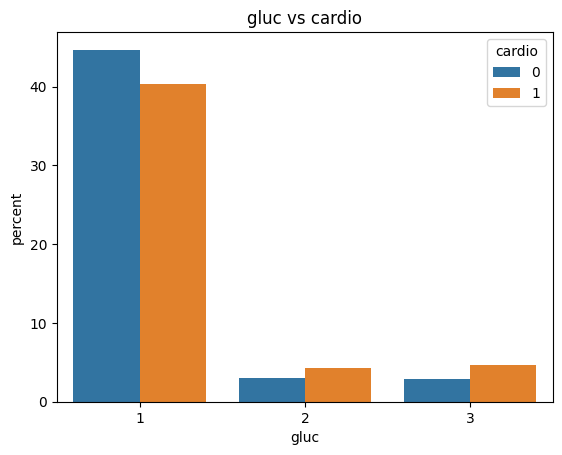

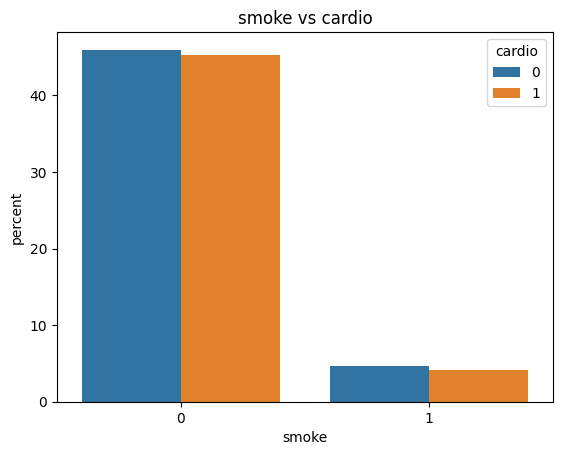

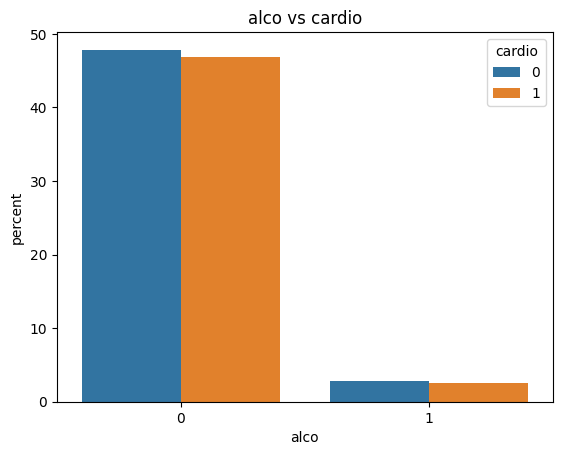

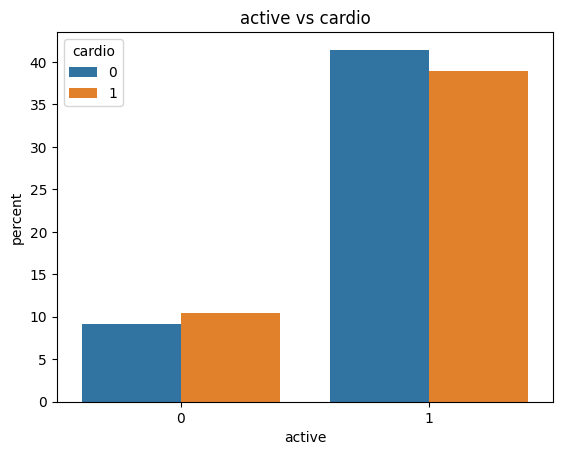

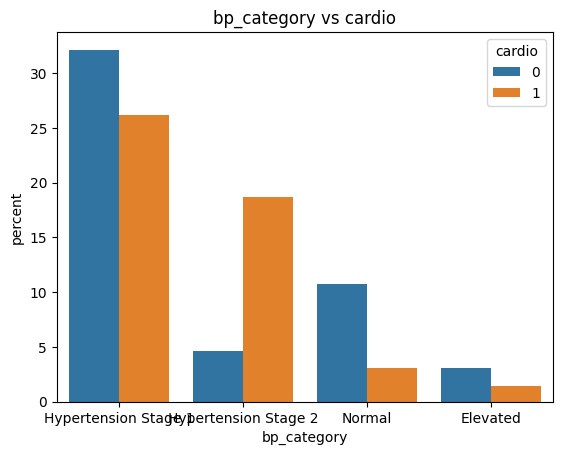

In [6]:
cat_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_category']
for col in cat_cols:
    sns.countplot(x=col, hue='cardio', data=df, stat='percent')
    plt.title(f"{col} vs cardio")
    plt.show()

** Feature Relationships**
our gola is to find correlations between numeric variables

<Axes: >

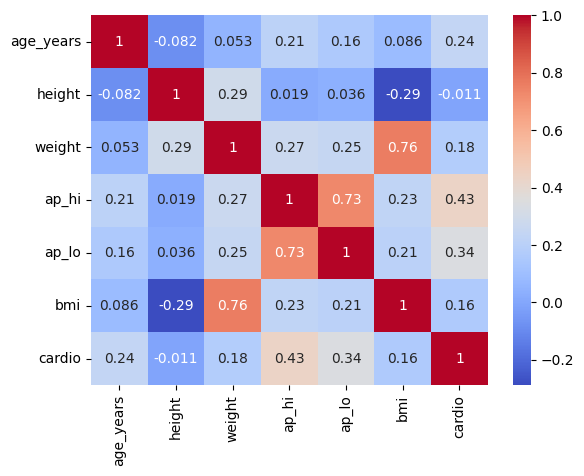

In [7]:
# ENTENDER MELHOR ESSE GRAFICO E O CALCULO DE CORRELACAO

# calculate Pearson coefficient for linear correlation, with range [-1, 1]
sns.heatmap(df[numerical_cols + ['cardio']].corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='None', ylabel='weight'>

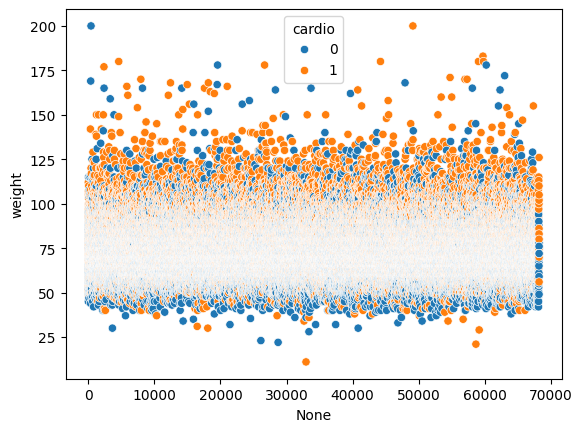

In [9]:
sns.scatterplot(data=df, x=df.index, y='weight', hue='cardio')